In [1]:
#IMPORTS
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


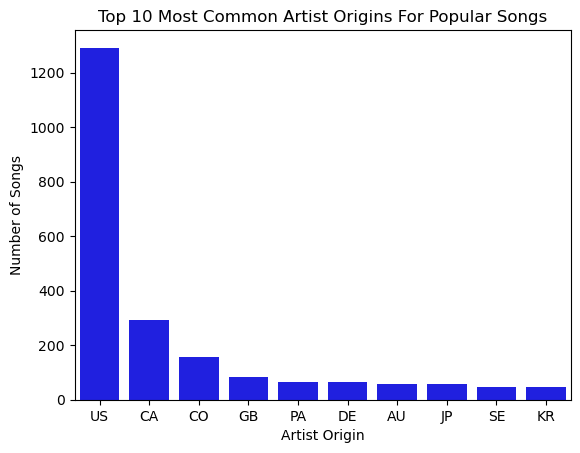

In [2]:

df = pd.read_csv('country_data.csv')
copy_of_all_data=df
df=df[["Country", "country", "Artists", "Continent"]]
df.rename(columns = {'Country':'Place of Popularity'}, inplace = True)
df.rename(columns = {'country':'Artist Origin'}, inplace = True)
df['Artist Origin'] = df['Artist Origin'].replace("PR", "US")


#Showing plot of the most common countries that artists are from:
country_counts=df.groupby("Artist Origin")["Artists"].count().reset_index(name ="counts")
country_counts=country_counts.sort_values("counts", ascending=False)


#print(country_counts.head())
ax=sns.barplot(x="Artist Origin", y="counts", data=country_counts[0:10], color="blue")
ax.set(xlabel='Artist Origin', ylabel='Number of Songs', title="Top 10 Most Common Artist Origins For Popular Songs")
plt.show()
#print(country_counts[0:10])
#country_counts[0:10]

53    US
8     CA
11    CO
20    GB
41    PA
13    DE
2     AU
33    JP
46    SE
Name: Artist Origin, dtype: object
   Artist Origin  counts  ratio  ratio_noNA  US_ratio
53            US    1291   0.74    0.822222  0.822222
8             CA     292   0.16    0.177778  0.688889
11            CO     156   0.30    0.306122  0.530612
20            GB      84   0.26    0.342105  0.368421
41            PA      65   0.26    0.265306  0.591837
13            DE      65   0.00    0.000000  0.250000
2             AU      57   0.04    0.050000  0.575000
33            JP      56   0.94    0.940000  0.060000
46            SE      48   0.34    0.404762  0.214286


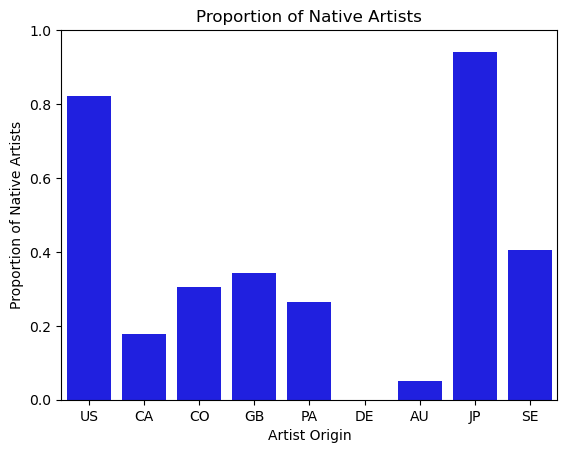

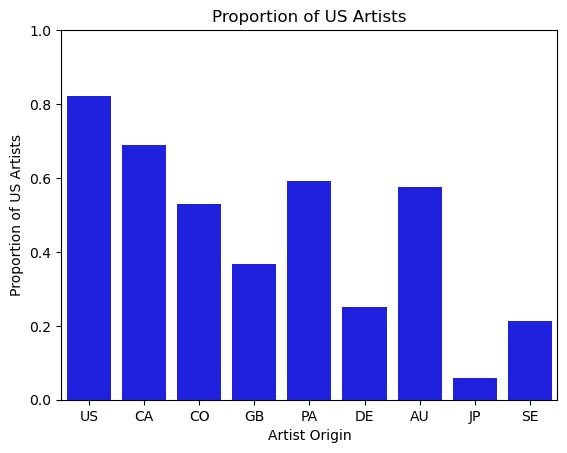

In [72]:

#Showing plot of how native songs are:

#country=df.groupby("Country")["country"].count()
#gkk = df.groupby(['Country', 'country'])
#print(df.head())

def find_native_songs(df, key_initial, key_full_names):
    ratio=[]
    ratio_noNA=[]
    US_ratio=[]
    index=0
    for country in key_full_names:
        sorted_countries=df[df["Place of Popularity"]==country]
        country_initials=key_initial.iloc[index]
        native_songs=sorted_countries[sorted_countries["Artist Origin"]==country_initials]
        non_native_songs=sorted_countries[sorted_countries["Artist Origin"]!=key_initial.iloc[index]]
        ratio.append(native_songs.shape[0]/(native_songs.shape[0]+non_native_songs.shape[0]))
        #print(key_initial.iloc[index])
        #print(country)
        #print(native_songs.head())
        #print(sorted_countries.head())
        index+=1  
    index=0
    for country in key_full_names:
        sorted_countries=df[df["Place of Popularity"]==country]
        country_initials=key_initial.iloc[index]
        native_songs=sorted_countries[sorted_countries["Artist Origin"]==country_initials].dropna()
        #print(native_songs.head())
        non_native_songs=sorted_countries[sorted_countries["Artist Origin"]!=key_initial.iloc[index]].dropna()
        ratio_noNA.append(native_songs.shape[0]/(native_songs.shape[0]+non_native_songs.shape[0]))
        index+=1 

    for country in key_full_names:
        sorted_countries=df[df["Place of Popularity"]==country]
        native_songs=sorted_countries[sorted_countries["Artist Origin"]=="US"].dropna()
        #print(native_songs.head())
        non_native_songs=sorted_countries[sorted_countries["Artist Origin"]!="US"].dropna()
        US_ratio.append(native_songs.shape[0]/(native_songs.shape[0]+non_native_songs.shape[0]))
    return ratio, ratio_noNA, US_ratio

#print(non_native_songs)
key_initial=country_counts[0:9]["Artist Origin"] #Gives country counts of the artists
print(key_initial)
key_full_names=["United States", "Canada", "Colombia", "United Kingdom", 
                "Panama", "Denmark", "Australia", "Japan", "Sweden"]
ratio, ratio_noNA, US_ratio=find_native_songs(df, key_initial, key_full_names)
data=country_counts[0:9]
data["ratio"]=ratio
data["ratio_noNA"]=ratio_noNA
data["US_ratio"]=US_ratio
print(data)


#data=[country_counts[0:9], ratio]
"""
ax2=sns.barplot(data=data, x="Artist Origin", y="ratio", color="blue")
ax2.set(xlabel='Artist Origin', ylabel='Proportion of ', title="TBD")
plt.show()
"""
ax3=sns.barplot(data=data, x="Artist Origin", y="ratio_noNA", color="blue")
ax3.set(xlabel='Artist Origin', ylabel='Proportion of Native Artists', title="Proportion of Native Artists")
ax3.set_ylim(0,1)
plt.show()

ax4=sns.barplot(data=data, x="Artist Origin", y="US_ratio", color="blue")
ax4.set(xlabel='Artist Origin', ylabel='Proportion of US Artists', title="Proportion of US Artists")
ax4.set_ylim(0,1)
plt.show()

      Continents     Ratio
1           Asia  0.302273
0         Europe  0.428689
3  South America  0.503480
4      Australia  0.573171
6         Africa  0.644444
2  North America  0.664557
5         Global  0.666667


[Text(0.5, 0, 'Frequency of US Songs'), Text(0, 0.5, 'Continent')]

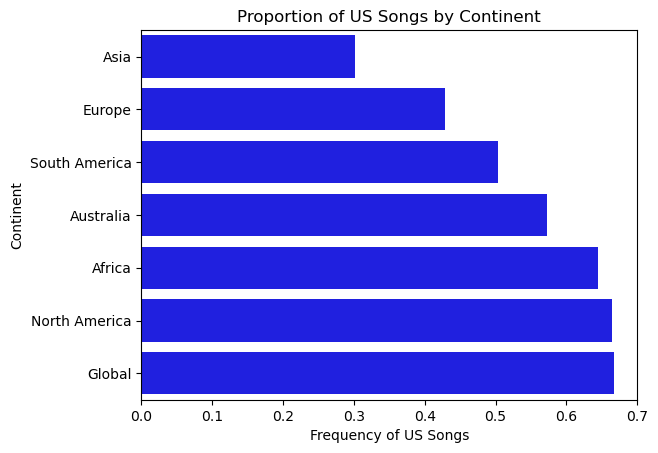

In [73]:
def amer_songs_by_continent(df):
    ratio=[]
    index=0
    US_songs=df[df["Artist Origin"]=="US"].dropna()
    non_US_songs=df[df["Artist Origin"]!="US"].dropna()
    ratio=US_songs.shape[0]/(non_US_songs.shape[0]+US_songs.shape[0])
    return ratio

continents=[]
european_songs=df[df["Continent"]=="Europe"]
asian_songs=df[df["Continent"]=="Asia"]
north_american_songs=df[df["Continent"]=="North America"]
south_american_songs=df[df["Continent"]=="South America"]
australian_songs=df[df["Continent"]=="Australia"]
global_songs=df[df["Continent"]=="Global"]
african_songs=df[df["Continent"]=="Africa"]
continents=[european_songs, asian_songs, north_american_songs, south_american_songs, australian_songs, global_songs, african_songs]
tot_ratio=[]
for continent in continents:
    ratio=amer_songs_by_continent(continent)
    tot_ratio.append(ratio)
#print(tot_ratio)

continents=["Europe", "Asia", "North America", "South America", "Australia", "Global", "Africa"]
data = pd.DataFrame(list(zip(continents, tot_ratio)))
data.columns=["Continents", "Ratio"]
data=data.sort_values(by=['Ratio'])

print(data)
ax4=sns.barplot(data=data, x="Ratio", y="Continents", color="blue")
'Frequency Of American Songs'
ax4.set(title="Proportion of US Songs by Continent")
ax4.set(xlabel='Frequency of US Songs', ylabel='Continent')
#ax4.set_xticklabels(ax.get_xticklabels(), rotation=40)

#print(european_songs.head())

      Continents     Ratio
3  South America  0.041763
2  North America  0.067511
1           Asia  0.118182
0         Europe  0.131080
5         Global  0.155556
6         Africa  0.177778
4      Australia  0.195122


[Text(0.5, 1.0, 'Preportion of CA Songs by Continent')]

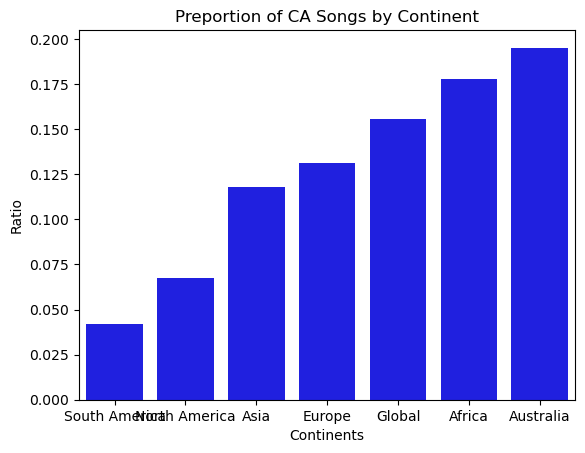

In [5]:
def amer_songs_by_continent(df):
    ratio=[]
    index=0
    US_songs=df[df["Artist Origin"]=="CA"].dropna()
    non_US_songs=df[df["Artist Origin"]!="CA"].dropna()
    ratio=US_songs.shape[0]/(non_US_songs.shape[0]+US_songs.shape[0])
    return ratio

continents=[]
european_songs=df[df["Continent"]=="Europe"]
asian_songs=df[df["Continent"]=="Asia"]
north_american_songs=df[df["Continent"]=="North America"]
south_american_songs=df[df["Continent"]=="South America"]
australian_songs=df[df["Continent"]=="Australia"]
global_songs=df[df["Continent"]=="Global"]
african_songs=df[df["Continent"]=="Africa"]
continents=[european_songs, asian_songs, north_american_songs, south_american_songs, australian_songs, global_songs, african_songs]
tot_ratio=[]
for continent in continents:
    ratio=amer_songs_by_continent(continent)
    tot_ratio.append(ratio)
#print(tot_ratio)

continents=["Europe", "Asia", "North America", "South America", "Australia", "Global", "Africa"]
data = pd.DataFrame(list(zip(continents, tot_ratio)))
data.columns=["Continents", "Ratio"]
data=data.sort_values(by=['Ratio'])

print(data)
ax4=sns.barplot(data=data, x="Continents", y="Ratio", color="blue")
ax4.set(title="Preportion of CA Songs by Continent")
#print(european_songs.head())

      Continents     Ratio
1           Asia  0.000000
4      Australia  0.000000
6         Africa  0.000000
0         Europe  0.007420
5         Global  0.044444
2  North America  0.128692
3  South America  0.194896


[Text(0.5, 1.0, 'Preportion of CO Songs by Continent')]

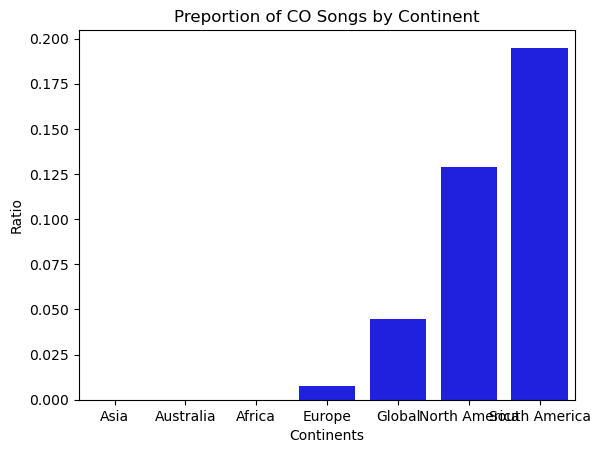

In [6]:
def amer_songs_by_continent(df):
    ratio=[]
    index=0
    US_songs=df[df["Artist Origin"]=="CO"].dropna()
    non_US_songs=df[df["Artist Origin"]!="CO"].dropna()
    ratio=US_songs.shape[0]/(non_US_songs.shape[0]+US_songs.shape[0])
    return ratio

continents=[]
european_songs=df[df["Continent"]=="Europe"]
asian_songs=df[df["Continent"]=="Asia"]
north_american_songs=df[df["Continent"]=="North America"]
south_american_songs=df[df["Continent"]=="South America"]
australian_songs=df[df["Continent"]=="Australia"]
global_songs=df[df["Continent"]=="Global"]
african_songs=df[df["Continent"]=="Africa"]
continents=[european_songs, asian_songs, north_american_songs, south_american_songs, australian_songs, global_songs, african_songs]
tot_ratio=[]
for continent in continents:
    ratio=amer_songs_by_continent(continent)
    tot_ratio.append(ratio)
#print(tot_ratio)

continents=["Europe", "Asia", "North America", "South America", "Australia", "Global", "Africa"]
data = pd.DataFrame(list(zip(continents, tot_ratio)))
data.columns=["Continents", "Ratio"]
data=data.sort_values(by=['Ratio'])

print(data)
ax4=sns.barplot(data=data, x="Continents", y="Ratio", color="blue")
ax4.set(title="Preportion of CO Songs by Continent")
#print(european_songs.head())

      Continents     Ratio
2  North America  0.000000
3  South America  0.000000
4      Australia  0.000000
5         Global  0.000000
6         Africa  0.000000
1           Asia  0.006818
0         Europe  0.051113


[Text(0.5, 1.0, 'Preportion of GB Songs by Continent')]

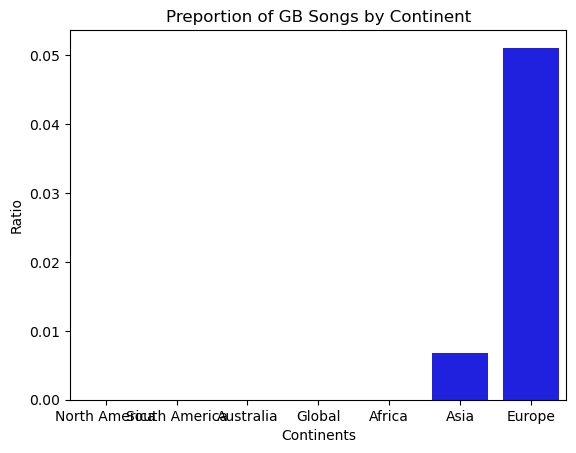

In [7]:
def amer_songs_by_continent(df):
    ratio=[]
    index=0
    US_songs=df[df["Artist Origin"]=="DE"].dropna()
    non_US_songs=df[df["Artist Origin"]!="DE"].dropna()
    ratio=US_songs.shape[0]/(non_US_songs.shape[0]+US_songs.shape[0])
    return ratio

continents=[]
european_songs=df[df["Continent"]=="Europe"]
asian_songs=df[df["Continent"]=="Asia"]
north_american_songs=df[df["Continent"]=="North America"]
south_american_songs=df[df["Continent"]=="South America"]
australian_songs=df[df["Continent"]=="Australia"]
global_songs=df[df["Continent"]=="Global"]
african_songs=df[df["Continent"]=="Africa"]
continents=[european_songs, asian_songs, north_american_songs, south_american_songs, australian_songs, global_songs, african_songs]
tot_ratio=[]
for continent in continents:
    ratio=amer_songs_by_continent(continent)
    tot_ratio.append(ratio)
#print(tot_ratio)

continents=["Europe", "Asia", "North America", "South America", "Australia", "Global", "Africa"]
data = pd.DataFrame(list(zip(continents, tot_ratio)))
data.columns=["Continents", "Ratio"]
data=data.sort_values(by=['Ratio'])

print(data)
ax4=sns.barplot(data=data, x="Continents", y="Ratio", color="blue")
ax4.set(title="Preportion of GB Songs by Continent")
#print(european_songs.head())

      Continents     Ratio
0         Europe  0.000000
2  North America  0.000000
3  South America  0.000000
4      Australia  0.000000
5         Global  0.000000
6         Africa  0.000000
1           Asia  0.127273


[Text(0.5, 1.0, 'Preportion of JP Songs by Continent')]

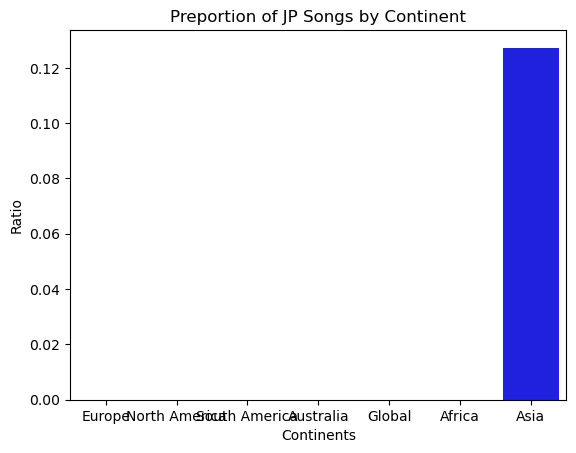

In [9]:
def amer_songs_by_continent(df):
    ratio=[]
    index=0
    US_songs=df[df["Artist Origin"]=="JP"].dropna()
    non_US_songs=df[df["Artist Origin"]!="JP"].dropna()
    ratio=US_songs.shape[0]/(non_US_songs.shape[0]+US_songs.shape[0])
    return ratio

continents=[]
european_songs=df[df["Continent"]=="Europe"]
asian_songs=df[df["Continent"]=="Asia"]
north_american_songs=df[df["Continent"]=="North America"]
south_american_songs=df[df["Continent"]=="South America"]
australian_songs=df[df["Continent"]=="Australia"]
global_songs=df[df["Continent"]=="Global"]
african_songs=df[df["Continent"]=="Africa"]
continents=[european_songs, asian_songs, north_american_songs, south_american_songs, australian_songs, global_songs, african_songs]
tot_ratio=[]
for continent in continents:
    ratio=amer_songs_by_continent(continent)
    tot_ratio.append(ratio)
#print(tot_ratio)

continents=["Europe", "Asia", "North America", "South America", "Australia", "Global", "Africa"]
data = pd.DataFrame(list(zip(continents, tot_ratio)))
data.columns=["Continents", "Ratio"]
data=data.sort_values(by=['Ratio'])

print(data)
ax4=sns.barplot(data=data, x="Continents", y="Ratio", color="blue")
ax4.set(title="Preportion of JP Songs by Continent")
#print(european_songs.head())

   year  count
0  1959   0.80
1  1960   0.78
2  1961   0.90
3  1962   0.84
4  1963   0.82


[Text(0.5, 1.0, 'Frequency of American Artists in Top 100 US Songs Per Year')]

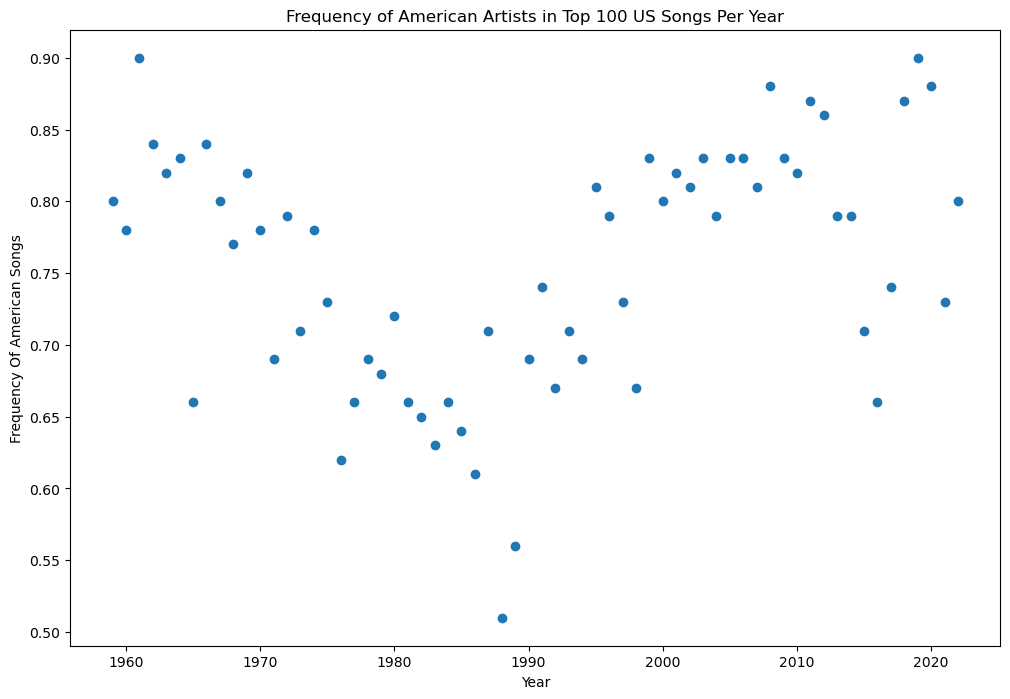

In [70]:
import re
import matplotlib.pyplot as plt

fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)
df2 = pd.read_csv('date_data.csv')
copy_of_all_data=df

year = re.compile(r'([0-9]+)')
df2["year"]  = df2["date"].str.extract(year)

df2['country'] = df2['country'].replace("PR", "US")

#df2["US"]=df2["country"]=="US"

frequency_ratio=df2.groupby('year')['country'].apply(lambda x: x[x == 'US'].count()/100).reset_index(name='count') 
#ax5=sns.scatterplot(data=frequency_ratio, x="year", y="count")
#ax5.set(title="Proportion of US Songs over Time")
#ax5.set_xticklabels(df2["year"], rotation = 90)

#ax5.yaxis.set_major_locator(plt.NullLocator())
#ax5.xaxis.set_major_formatter(plt.NullFormatter())


#print(df2.head())
print(frequency_ratio.head())

import matplotlib.pyplot as plt
frequency_ratio["year"]=frequency_ratio["year"].astype(int)
plt.scatter(frequency_ratio["year"], frequency_ratio["count"])
ax = plt.gca()
ax.set(xlabel='Year', ylabel='Frequency Of American Songs', title="Top 10 Most Common Artist Origins For Popular Songs")
ax.set(title="Frequency of American Artists in Top 100 US Songs Per Year")
#plt.xticks(rotation = 90)
#plt.show()

#df2=df[["Country", "country", "Artists", "Continent"]]
#df.rename(columns = {'Country':'Place of Popularity'}, inplace = True)
#df.rename(columns = {'country':'Artist Origin'}, inplace = True)
#df['Artist Origin'] = df['Artist Origin'].replace("PR", "US")
